In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [359]:
df = pd.read_csv('glassdoor_jobs_cleaned.csv')

In [360]:
df.head()

,company,job title,location,job description,salary estimate,company_size,company_type,company_sector,company_industry,company_founded,...,scala,hadoop,sql,spark,aws,azure,gcp,airflow,snowflake,git
0,Tecolote Research\r\n,Data Scientist,"Albuquerque, NM","Data ScientistLocation: Albuquerque, NMEducati...",72.0,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,1973,...,0,0,0,0,0,0,0,0,0,0
1,University of Maryland Medical System\r\n,Healthcare Data Scientist,"Linthicum, MD",What You Will Do:I. General SummaryThe Healthc...,87.5,10000+ employees,Other Organization,Health Care,Health Care Services & Hospitals,1984,...,0,0,0,0,0,0,0,0,0,0
2,KnowBe4\r\n,Data Scientist,"Clearwater, FL","KnowBe4, Inc. is a high growth information sec...",85.0,501 to 1000 employees,Company - Private,Business Services,Security Services,2010,...,0,0,1,1,0,0,0,0,0,0
3,PNNL\r\n,Data Scientist,"Richland, WA",*Organization and Job ID**Job ID: 310709Direct...,76.5,1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",Energy,1965,...,0,0,0,0,0,0,0,0,0,0
4,Affinity Solutions\r\n,Data Scientist,"New York, NY",Data ScientistAffinity Solutions / Marketing C...,114.5,51 to 200 employees,Company - Private,Business Services,Advertising & Marketing,1998,...,0,0,1,0,0,0,0,0,0,0


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           457 non-null    object 
 1   job title         457 non-null    object 
 2   location          457 non-null    object 
 3   job description   457 non-null    object 
 4   salary estimate   457 non-null    float64
 5   company_size      457 non-null    object 
 6   company_type      457 non-null    object 
 7   company_sector    457 non-null    object 
 8   company_industry  457 non-null    object 
 9   company_founded   457 non-null    int64  
 10  state code        457 non-null    object 
 11  company_age       457 non-null    int64  
 12  python            457 non-null    int64  
 13  java              457 non-null    int64  
 14  scala             457 non-null    int64  
 15  hadoop            457 non-null    int64  
 16  sql               457 non-null    int64  
 1

In [362]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'date scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'ml engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'Senior'
    elif 'junior' in title.lower() or 'jr' in title.lower():
        return 'Junior'
    else :
        return 'na'


In [363]:
#Simplify Job title and seniority
df['job title simp'] = df['job title'].apply(title_simplifier)
df['seniority'] = df['job title'].apply(seniority)

In [364]:
df['job title simp'].value_counts()


date scientist    192
na                 92
data engineer      75
data analyst       67
manager            12
ml engineer        11
director            8
Name: job title simp, dtype: int64

In [365]:
df['seniority'].value_counts()

na        335
Senior    119
Junior      3
Name: seniority, dtype: int64

In [376]:
df_skills = df.loc[:,"python":"git"].agg(sum)
df_skills.sort_values(ascending=False, inplace=True)
df_skills = df_skills.to_frame().reset_index().rename(columns={'index':'tech',0:'score' })
df_skills

,tech,score
0,python,260
1,sql,255
2,spark,111
3,aws,110
4,git,109
5,scala,104
6,java,100
7,hadoop,82
8,azure,37
9,gcp,17


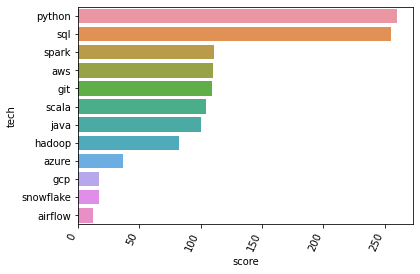

In [377]:
ax  = sns.barplot(data = df_skills, x='score', y='tech')
plt.xticks(rotation=66, horizontalalignment= 'right')
plt.show()

In [378]:
df.describe()

,salary estimate,company_founded,company_age,python,java,scala,hadoop,sql,spark,aws,azure,gcp,airflow,snowflake,git
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,102.640044,1829.343545,193.656455,0.568928,0.218818,0.227571,0.179431,0.557987,0.242888,0.240700,0.080963,0.037199,0.026258,0.037199,0.238512
std,35.960795,513.752396,513.752396,0.495769,0.413898,0.419724,0.384133,0.497170,0.429298,0.427977,0.273077,0.189457,0.160077,0.189457,0.426641
min,15.500000,-1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.500000,1939.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,98.500000,1992.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,121.500000,2007.000000,84.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,254.000000,2019.000000,2024.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

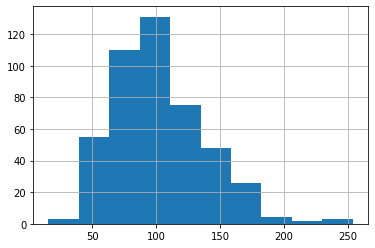

In [379]:
df['salary estimate'].hist()

<AxesSubplot:>

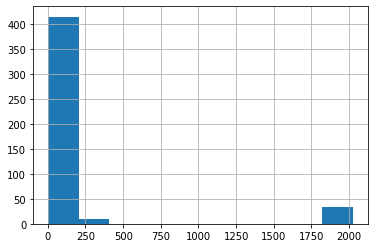

In [380]:
df['company_age'].hist()

In [383]:
df[['salary estimate', 'company_age']].corr()

,salary estimate,company_age
salary estimate,1.000000,0.011095
company_age,0.011095,1.000000


In [375]:
df.columns

Index(['company', 'job title', 'location', 'job description',
       'salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'state code', 'company_age',
       'python', 'java', 'scala', 'hadoop', 'sql', 'spark', 'aws', 'azure',
       'gcp', 'airflow', 'snowflake', 'git', 'job title simp', 'seniority'],
      dtype='object')

graph for job title: total = 20


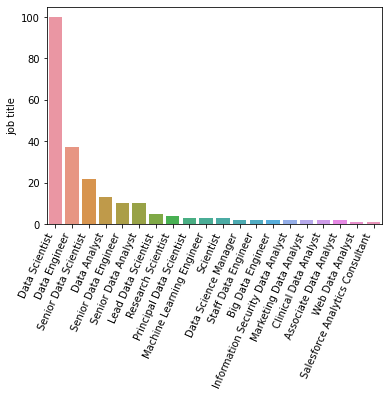

graph for average salary (K USD) for job title: average salary = 184.25 (K USD)


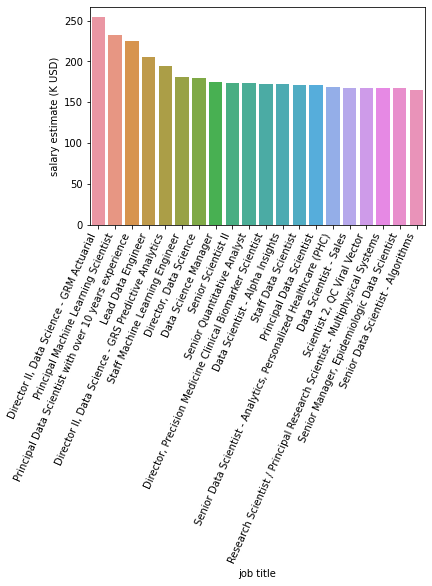

graph for location: total = 20


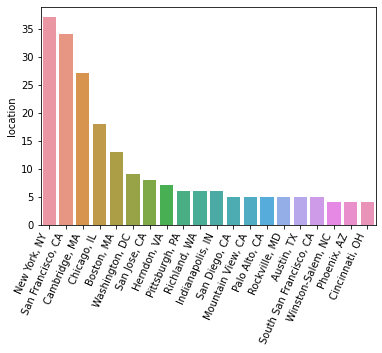

graph for average salary (K USD) for location: average salary = 148.44962009803922 (K USD)


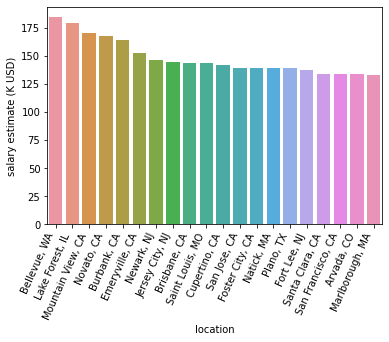

graph for company_size: total = 7


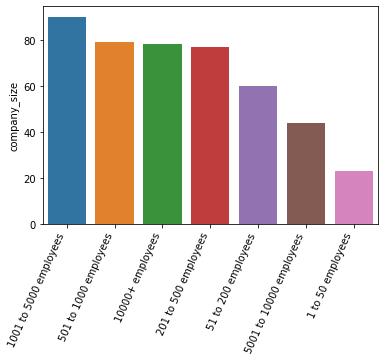

graph for average salary (K USD) for company_size: average salary = 103.3180409744094 (K USD)


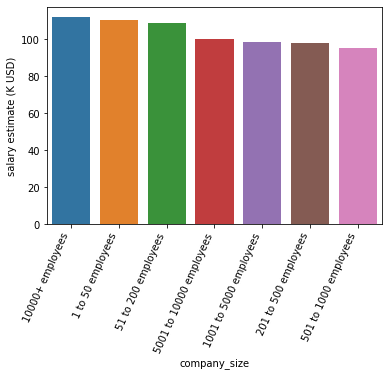

graph for company_type: total = 9


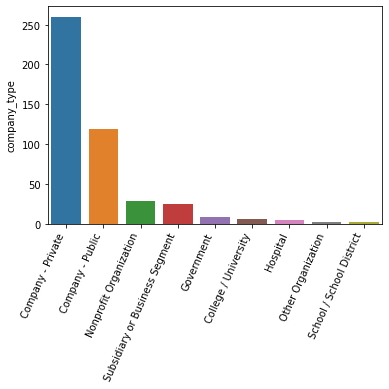

graph for average salary (K USD) for company_type: average salary = 92.63239026055456 (K USD)


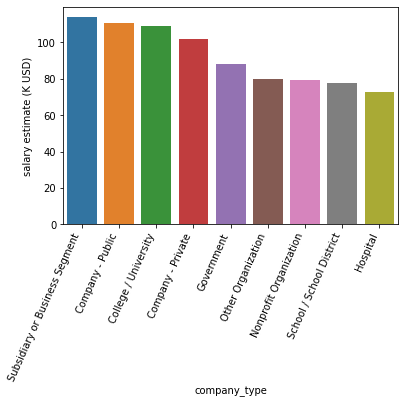

graph for company_sector: total = 20


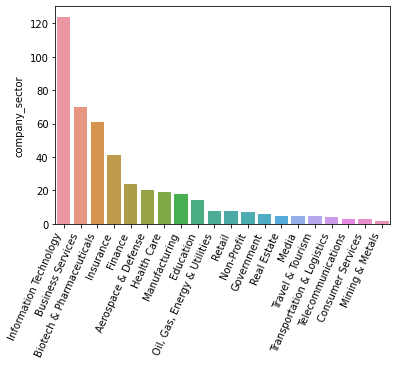

graph for average salary (K USD) for company_sector: average salary = 99.7641184320933 (K USD)


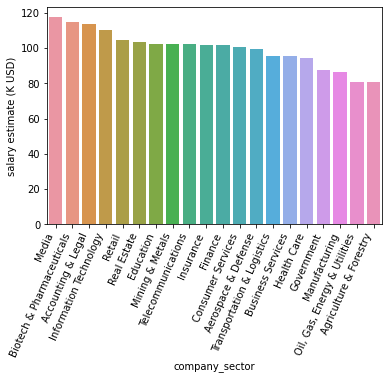

graph for company_industry: total = 20


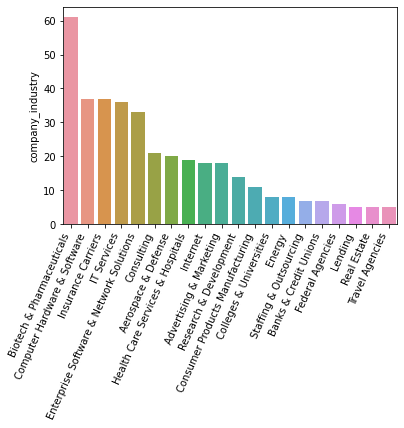

graph for average salary (K USD) for company_industry: average salary = 122.9903353707657 (K USD)


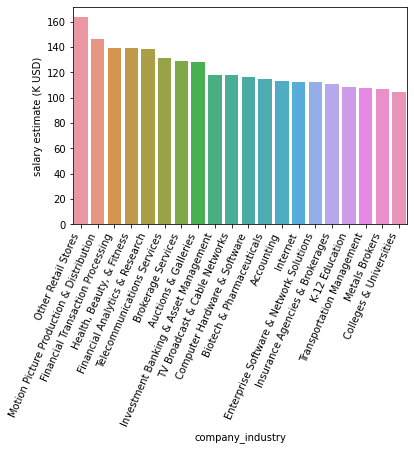

graph for state code: total = 20


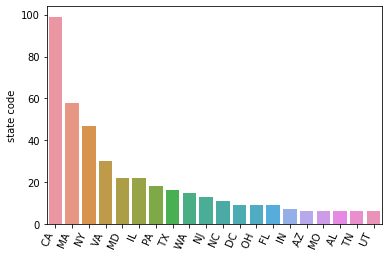

graph for average salary (K USD) for state code: average salary = 99.88506302442565 (K USD)


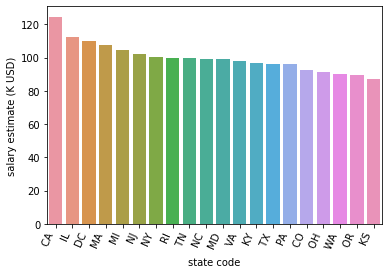

In [432]:
df_cat = df[['job title','location', 'company_size', 'company_type', 'company_sector', 'company_industry', 'state code']]
for i in df_cat.columns:
    df_cat_clean = df_cat[(df_cat[i]!='-1') & (df_cat[i]!="Unknown")]
    #Number of offers by category
    cat_num = df_cat_clean[i].value_counts()[:20]
    print("graph for {}: total = {}".format(i, len(cat_num)))
    ax = sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=66, horizontalalignment= 'right')
    plt.show()
    #Average salary by category
    cat_salary = df[(df[i]!='-1') & (df[i]!="Unknown")].groupby(i).agg({'salary estimate': 'mean'}).sort_values('salary estimate', ascending=False)[:20]
    print("graph for average salary (K USD) for {}: average salary = {} (K USD)".format(i, cat_salary['salary estimate'].mean()))
    ax = sns.barplot(data= cat_salary, x=cat_salary.index, y='salary estimate')
    ax.set(ylabel='salary estimate (K USD)')
    plt.xticks(rotation=66, horizontalalignment= 'right')
    plt.show()



In [436]:
pd.pivot_table(data = df, index = 'job title simp', values = 'salary estimate')

,salary estimate
job title simp,
data analyst,67.320896
data engineer,102.866667
date scientist,115.906250
director,156.937500
manager,89.791667
ml engineer,128.045455
na,94.407609


In [437]:
pd.pivot_table(data = df, index = ['job title simp', 'seniority'], values = 'salary estimate')

salary estimate
job title simp seniority                 
data analyst   Junior           53.250000
               Senior           82.718750
               na               62.867347
data engineer  Senior          124.416667
               na               96.061404
date scientist Junior          106.500000
               Senior          138.358491
               na              107.351449
director       na              156.937500
manager        na               89.791667
ml engineer    Senior          163.166667
               na              114.875000
na             Senior          115.620690
               na               84.642857

In [440]:
pd.pivot_table(data = df, index = ['state code', 'job title simp'], values = 'salary estimate')

salary estimate
state code job title simp                 
 AL        data analyst          60.750000
           data engineer         65.000000
           na                    51.833333
 AZ        data analyst          55.000000
           data engineer         76.333333
...                                    ...
 WA        date scientist        99.272727
           na                    97.500000
 WI        data analyst          58.250000
           date scientist       110.250000
           na                    54.000000

[110 rows x 1 columns]

In [449]:
df.head()

,company,job title,location,job description,salary estimate,company_size,company_type,company_sector,company_industry,company_founded,...,sql,spark,aws,azure,gcp,airflow,snowflake,git,job title simp,seniority
0,Tecolote Research\r\n,Data Scientist,"Albuquerque, NM","Data ScientistLocation: Albuquerque, NMEducati...",72.0,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,1973,...,0,0,0,0,0,0,0,0,date scientist,na
1,University of Maryland Medical System\r\n,Healthcare Data Scientist,"Linthicum, MD",What You Will Do:I. General SummaryThe Healthc...,87.5,10000+ employees,Other Organization,Health Care,Health Care Services & Hospitals,1984,...,0,0,0,0,0,0,0,0,date scientist,na
2,KnowBe4\r\n,Data Scientist,"Clearwater, FL","KnowBe4, Inc. is a high growth information sec...",85.0,501 to 1000 employees,Company - Private,Business Services,Security Services,2010,...,1,1,0,0,0,0,0,0,date scientist,na
3,PNNL\r\n,Data Scientist,"Richland, WA",*Organization and Job ID**Job ID: 310709Direct...,76.5,1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",Energy,1965,...,0,0,0,0,0,0,0,0,date scientist,na
4,Affinity Solutions\r\n,Data Scientist,"New York, NY",Data ScientistAffinity Solutions / Marketing C...,114.5,51 to 200 employees,Company - Private,Business Services,Advertising & Marketing,1998,...,1,0,0,0,0,0,0,0,date scientist,na
